# K-Nearest Neighbors

_Dec 14, 2020_

Agenda today:
- Distance Metrics
    - Manhattan Distance
    - Euclidean Distance
    - Minkowski Distance
- K-Nearest Neighbor
    - how it works
    - Implementing KNN using sklearn
    - evaluting your knn with evaluation metrics
    - selecting the optimal hyperparameter

____
#### Parametric vs. Nonparametric models 
The difference between parametric models (such as Linear regression, Linear Discriminant Analysis) and non-parametric models (KNN, K-means, decision tree) is that parametric models make certain assumptions of the underlying data distribution. Nonparametric models allow us to apply the models to data that are not normally distributed. Therefore, if some assumptions of your data is not met, you can use non-parametric algorithms. An important note: we only say whether our models are parametric, not our data. 


___
## Part I. Distance Metrics
 
#### Manhattan Distance
The Manhattan distance is the sum of the absolute values of the Cartesian coordinates. You can think of Manhattan distance as moving through **grids**. In the image below, only the green line is infeasible to calculate the Manhattan distance. The equation for calculating Manhattan distance is

$$D(x,y) = \sum_{k=1}^{n} {|x_k - y_k|}$$

<img src="attachment:Screen%20Shot%202019-03-13%20at%209.50.52%20AM.png" style="width:500px;">

In [24]:
# an example for calculating the manhattan distance
import numpy as np
point_a = (1,2)
point_b = (3,4)
manhattan_dis = 0
for i in range(len(point_a)):
    manhattan_dis +=  np.abs(point_a[i] - point_b[i])

In [25]:
manhattan_dis

4

#### Euclidean Distance
Euclidean distance is the shortest distance between two points, and it is the most common used distance metrics. To calculate the Euclidean distance between two coordinates a(x1,y1) and b(x2,y2), the formula is:
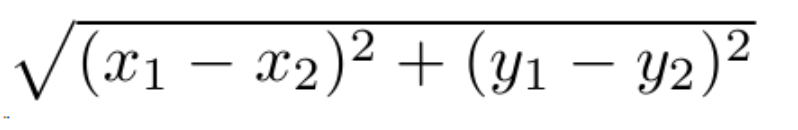

General formula for n-dimensional calculation:
$$d(x,y) = \sqrt[2]{\sum_{k=1}^{n}{(x_k - y_k)^2}}$$



In [26]:
# an example of calculating Euclidean distance 
euclidean_dist = 0
for i in range(len(point_a)):
    euclidean_dist += (point_a[i] - point_b[i])**2
euclidean_dist =  np.sqrt(euclidean_dist)
euclidean_dist

2.8284271247461903

#### Minkowski Distance
Minkowski distance is a generalized format for calculating distance in n-dimensional normed vector space. It takes on the formula of:

$$d(x,y) = \sqrt[r] {\sum_{k=1}^{n}{(x_k - y_k)^r}}$$

As you can see, the Manhattan Distance and Euclidean distance are special cases of the Minkowski Distance. The Manhattan distance takes on the notation of l1 norm and Euclidean distance takes on the notation of l2 norm. What does this remind you of?

In [29]:
#Manhattan Distance is the sum of all side lengths to the first power
# manhattan_distance = (length_side_1 + length_side2 + ...+ length_side_n)**1  

# Euclidean Distance is the square root of the sum of all side lengths to the second power
# euclidean_distance = np.sqrt((length_side_1 + length_side2 + ...+ length_side_n)**2)

# Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power
# minkowski_distance_3 = np.cbrt((length_side_1 + length_side2 + ...+ length_side_n)**3)

## Part II. K-Nearest Neighbor
KNN is a simple, nonparametric, and lazy algorithm used for both regression and classification. It is nonparametric because it doesn't make any assumption of the underlying data distribution, and it is **lazy** because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead. The algorithm ascribe class membership based on the closest k neighbors to the testing observation concerned. KNN is a similarity based algorithm - the class membership of the observartion depends on the feature similarity to training observations. 

<img src="attachment:Screen%20Shot%202019-03-13%20at%2010.41.55%20AM.png" style="width:500px;">


As mentioned above, the similarity depends on the distance of observations from each other, which can be calculated using any of the distance metrics mentioned above. The most commonly used distance metrics is the Euclidean distance. However, which distance metrics you use as well as the value of k could affect the performance of your model. 

Decision boundary can change accordingly to different values of K. 

#### Implementing the KNN Classifier with sklearn

In [1]:
# using the irish dataset
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)

## Loading the data

In [27]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [28]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


#### scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [32]:
knn = KNeighborsClassifier(n_neighbors=1, p = 1)
# the n_neighbors is the parameter where you specify k

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [33]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [34]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [35]:
knn.predict([[3, 5, 4, 2]])

array([1])

- Returns a NumPy array
- Can predict for multiple observations at once

In [36]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([1, 1])

In [37]:
# tuning the k parameter 
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

In [38]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)


In [39]:
from sklearn.metrics import f1_score
# F1 = 2 * (precision * recall) / (precision + recall)
accuracy_score(y_test, y_predict)
#f1_score(y_test, y_predict, average='weighted')


1.0

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict, labels=None, sample_weight=None))
#print(classification_report(y_test, y_predict))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


#### searching for optimal hyperparameter K

In [40]:
# search for an optimal value of K for KNN
k_range = list(range(1, 11))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    k_scores.append( score)
print(k_scores)

[1.0, 1.0, 1.0, 1.0, 0.9736842105263158, 1.0, 0.9736842105263158, 1.0, 1.0, 1.0]


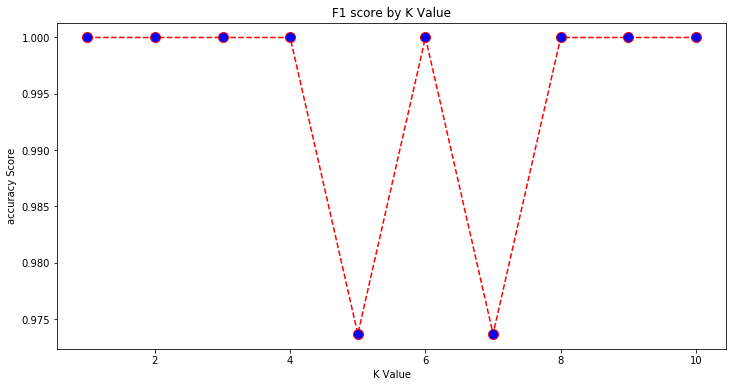

In [42]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 11), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('accuracy Score') 
plt.show()

## How does the number of K affect the bias variance tradeoff?

![alt text](images/K-NN_Neighborhood_Size_print.png)

![alt text](images/K-judgement2.webp)
![alt text](images/K-judgement.webp)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)
- Distance metrics for categorical variables 
- Precision and Recall for [multiclass problem](https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co)
- [KNN for regression](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)